In [1]:
import pandas as pd
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
import random
import numpy as np

In [2]:
def dataset_to_Xandy(dataset, target_variable):
    X = dataset.loc[:, dataset.columns != target_variable]
    y = dataset.loc[:, dataset.columns == target_variable]
    return X, y

def standardise(X):
    return (X - np.mean(X)) / np.std(X)

def split_dataset(X,y, randomlist, not_in_randomlist):
    X_train = X.iloc[randomlist,:]
    y_train = y.iloc[randomlist,:]
    X_test = X.iloc[not_in_randomlist,:]
    y_test = y.iloc[not_in_randomlist,:]
    return X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

def plot_conf_matrix(confusion_matrix,encoding):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.title('Confusion matrix for '+str(encoding)+' encoding')
    plt.show()  

def calc_conf_matrix(X,y,randomlist,not_in_randomlist,classifier):
    X_train, y_train, X_test, y_test = split_dataset(X,y,randomlist, not_in_randomlist)
    
    # depending on what the user inputs
    if classifier == 'logistic':
        model = LogisticRegression()  
    elif classifier == 'kNN':
        model = KNeighborsClassifier()  
    
    # perform fitting of the model 
    model.fit(X_train, y_train.reshape(-1,))  
    y_predicted = model.predict(X_test) 
    
    # computing confusion matrix, fpr, tpr, auc
    matrix = metrics.confusion_matrix(y_test, y_predicted)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
    area_roc = metrics.auc(fpr, tpr)
    return matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1], area_roc

def plot_boxplots_confusion(confusion_matrix,entry,which_dataset):
    dictionary = {}
    for key in confusion_matrix:
        dictionary[key] = confusion_matrix[key][entry]
    fig, ax = plt.subplots()
    ax.boxplot(dictionary.values())
    ax.set_xticklabels(dictionary.keys())
    if entry == '00':
        name = 'true negative'
    elif entry == '01':
        name = 'false positive'
    elif entry == '10':
        name = 'false negative'
    elif entry == '11':
        name = 'true positive'
    elif entry == 'accuracy':
        name = 'accuracy'
    elif entry == 'auc':
        name = 'area under ROC curve'
    plt.title('Boxplots of ' + name +' \n Test Size '+ str(out_of)+'\n Dataset:'+which_dataset)
    plt.show()    
    

def put_in_bins(data, how_many_bins):
    mi = min(data)
    ma = max(data)

    bins = np.linspace(mi+0.0001, ma+0.0001,how_many_bins)
    digitized = np.digitize(data,bins)
    midpoints_bins = (bins[:len(bins)-1] + bins[1:])/2
    new_data = midpoints_bins[digitized-1]
    return new_data

def pick_only_some(df, target_variable, number):
    df0 = df.loc[df[target_variable] ==0 ]
    df1 = df.loc[df[target_variable] ==1 ]
    how_many_0 = df0.shape[0]
    how_many_1 = df1.shape[0]
    random_indices = random.sample(range(0, how_many_0), how_many_0 - number)
    df0 = df0.drop(df0.index[random_indices])
    random_indices = random.sample(range(0, how_many_1), how_many_1 - number)
    df1 = df1.drop(df1.index[random_indices])
    df = pd.concat([df0, df1])
    return df


In [3]:
######### HEART DATASET    

# which_dataset = 'Heart Ilness'
# df = pd.read_csv('datasets/heartdataset.csv')
# categorical_variables = ['cp','thal','slope','ca','restecg'] # Putting in this all the categorical columns
# target_variable = 'target' # Making sure the name of the target variable is known
# continuous_variables = ['age','trestbps','chol','thalach','oldpeak']
# binary_variables = ['sex','fbs','exang']

# df.head()

In [39]:
######### AIRLINE DATASET  

df = pd.read_csv('datasets/airline_dataset.csv')
categorical_variables = ['MONTH','DAY_OF_WEEK','DEP_TIME_BLK','DISTANCE_GROUP','SEGMENT_NUMBER','CARRIER_NAME', 'DEPARTING_AIRPORT','PREVIOUS_AIRPORT'] # Putting in this all the categorical columns
target_variable = 'DEP_DEL15' # Making sure the name of the target variable is known

continuous_variables = list(set(df.keys()) - set(categorical_variables + [target_variable]))

df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.00,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,...,NONE,0.00,0.0,0.0,54.0,0.45,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,...,San Jose International,0.00,0.0,0.0,64.0,8.05,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,...,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,0.203263,0.193761,0.203027,0.113050


In [40]:
# ######### CAR INSURANCE DATASET  

# which_dataset = 'Car Insurance'
# df = pd.read_csv('datasets/cardataset.csv')
# df = df.drop('policy_id',axis = 1)
# categorical_variables = ['area_cluster','make', 'segment','model', 'fuel_type','engine_type','airbags','steering_type','ncap_rating'] # Putting in this all the categorical columns
# target_variable = 'is_claim' # Making sure the name of the target variable is known

# binary_cols = ['gear_box','is_esc','is_adjustable_steering','is_tpms',
#                 'is_parking_sensors','is_parking_camera','rear_brakes_type',
#                 'cylinder','transmission_type','is_front_fog_lights'
#                 ,'is_rear_window_wiper','is_rear_window_washer'
#                 ,'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
#                 'is_central_locking','is_power_steering','is_driver_seat_height_adjustable',
#                 'is_day_night_rear_view_mirror','is_ecw','is_speed_alert']

# torque = df['max_torque']
# power = df['max_power']


# ########### Deciding what to do with the max_torque and max_power


# # list1 = []
# # list2 = []
# # list3 = []
# # list4 = []


# # for i in range(len(torque)):
# #     string = torque[i]
# #     index = string.find('Nm')
# #     index1 = string.find('rpm')
# #     index2 = string.find('@')
# #     list1.append (float(string[0:index])) 
# #     list2.append (float(string[index2+1:index1]))
    
# #     string2 = power[i]
# #     index = string2.find('bhp')
# #     index1 = string2.find('rpm')
# #     index2 = string2.find('@')
# #     list3.append (float(string2[0:index]) )
# #     list4.append (float(string2[index2+1:index1]))

# # df['max_torque'] = list1
# # df['max_torque_rpm'] = list2

# # df['max_power'] = list3
# # df['max_power_rpm'] = list4


# # continuous_variables = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
# #        'population_density', 'displacement','turning_radius',
# #        'length', 'width', 'height', 'gross_weight','max_torque','max_power', 'max_torque_rpm',
# #        'max_power_rpm']


# list1 = []
# list2 = []

# for i in range(len(torque)):
#     string = torque[i]
#     index = string.find('Nm')
#     index1 = string.find('rpm')
#     index2 = string.find('@')
#     list1.append (float(string[0:index]) * float(string[index2+1:index1])) 
    
#     string2 = power[i]
#     index = string2.find('bhp')
#     index1 = string2.find('rpm')
#     index2 = string2.find('@')
#     list2.append (float(string2[0:index]) *float(string2[index2+1:index1]) )
    
# df['max_torque'] = list1
# df['max_power'] = list2


# continuous_variables = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
#        'population_density', 'displacement','turning_radius',
#        'length', 'width', 'height', 'gross_weight','max_torque','max_power']


# ### make sure binary variables are 0 and 1
# labelencoder = ce.OrdinalEncoder(cols=binary_cols)
# df = labelencoder.fit_transform(df)

# df.head()

In [41]:
########### STROKE PREDICTION

# which_dataset = 'Stroke Prediction'

# df = pd.read_csv('datasets/stroke_dataset.csv')
# df = df.drop('id',axis = 1)
# df = df.dropna().reset_index(drop=True)
# df = df.replace('*82', 82)
# categorical_variables = ['gender','work_type','smoking_status'] # Putting in this all the categorical columns
# target_variable = 'stroke' # Making sure the name of the target variable is known

# binary_cols = ['Residence_type','ever_married','heart_disease','hypertension']

# df['age'] = df['age'].astype('float')

# ### make sure binary variables are 0 and 1
# labelencoder = ce.OrdinalEncoder(cols=binary_cols)
# df = labelencoder.fit_transform(df)

# continuous_variables = ['age', 'avg_glucose_level','bmi']

# df.head()

In [42]:
# ########### BODY SIGNAL SMOKING

# which_dataset = 'Body Signals for Smoking'
# df = pd.read_csv('datasets/bodysignal_smoking.csv')
# df = df.drop(['ID','oral'],axis = 1)


# categorical_variables = ['Urine protein'] # Putting in this all the categorical columns
# target_variable = 'smoking' # Making sure the name of the target variable is known

# binary_cols = ['tartar','dental caries','hearing(right)','hearing(left)','gender']

# ### make sure binary variables are 0 and 1
# labelencoder = ce.OrdinalEncoder(cols=binary_cols)
# df = labelencoder.fit_transform(df)

# continuous_variables = list(set(df.keys()) - set(categorical_variables + binary_cols + [target_variable]))

# continuous_variables

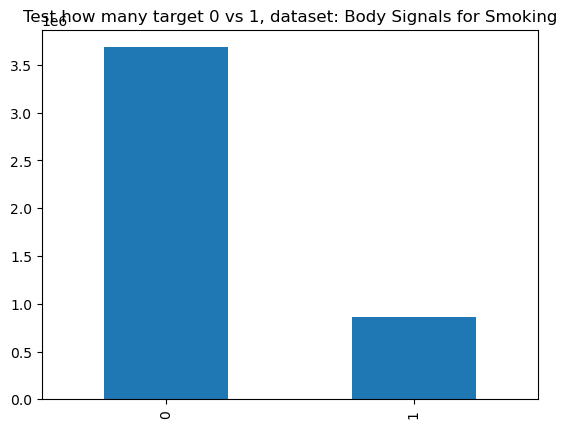

In [43]:
# Seeing if the data is balanced
plt.figure()
df[target_variable].value_counts().plot(kind='bar')
plt.title('Test how many target 0 vs 1, dataset: '+ which_dataset)
plt.show()

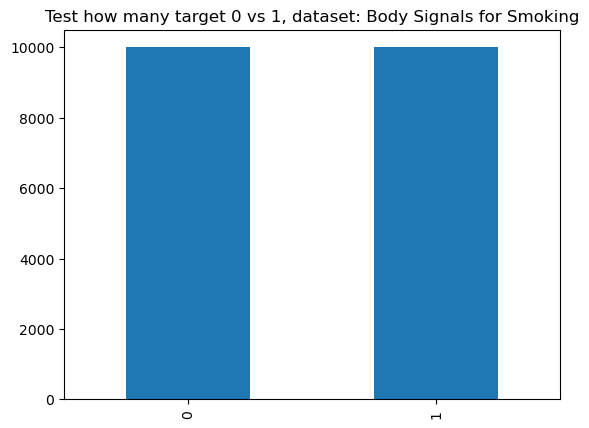

In [44]:
### Comment out code if wanted all of the data points in the original dataset


# df = pick_only_some(df, target_variable, 3000)  #### this is good for the car insurance dataset
# df = pick_only_some(df, target_variable, 100)  #### this is good for the stroke prediction dataset
# df = pick_only_some(df, target_variable, 15000)  #### this is good for the body signal dataset
df = pick_only_some(df, target_variable, 10000)  #### this is good for the airline dataset


df.reset_index(drop=True, inplace=True)
# Seeing if the data is balanced
plt.figure()
df[target_variable].value_counts().plot(kind='bar')
plt.title('Test how many target 0 vs 1, dataset: '+ which_dataset)
plt.show()

In [45]:
categ = len(categorical_variables)
cont = len(continuous_variables)

In [46]:
###### START - PREPROCESSING

size = df.shape[0] # size of the dataset

# Seeing if they are indeed categorical
for cat in categorical_variables:
    print(df[cat].value_counts())

6     1910
7     1897
8     1840
5     1725
12    1702
4     1670
3     1654
10    1637
9     1540
11    1517
1     1468
2     1440
Name: MONTH, dtype: int64
5    3135
4    3092
1    3009
7    2870
3    2824
2    2737
6    2333
Name: DAY_OF_WEEK, dtype: int64
1700-1759    1414
1800-1859    1352
1900-1959    1278
1200-1259    1272
2000-2059    1268
1600-1659    1256
1500-1559    1234
1400-1459    1197
0800-0859    1179
0900-0959    1176
1100-1159    1132
1000-1059    1090
0700-0759    1076
1300-1359    1049
0600-0659    1044
2100-2159     793
2200-2259     680
0001-0559     352
2300-2359     158
Name: DEP_TIME_BLK, dtype: int64
2     4666
3     4093
4     3186
1     2215
5     2161
6      945
7      913
10     568
8      491
11     421
9      341
Name: DISTANCE_GROUP, dtype: int64
2     4381
1     3910
3     3706
4     3456
5     2086
6     1601
7      511
8      285
9       40
11       8
10       8
12       4
13       2
15       1
14       1
Name: SEGMENT_NUMBER, dtype: int64
Southwest

In [47]:
for cont_col in continuous_variables:
    df[cont_col] = standardise(df[cont_col])
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,8,7,0,1000-1059,5,2,-0.270458,-1.237688,"Midwest Airline, Inc.",-0.198433,...,Detroit Metro Wayne County,-0.339477,-0.116158,-0.136611,0.305307,0.912647,0.053935,-0.227282,0.119985,-0.591675
1,11,4,0,1900-1959,2,6,-1.066563,0.192494,Southwest Airlines Co.,-1.227899,...,Tampa International,-0.311626,-0.116158,-0.136611,-0.552754,0.366809,-0.417850,-1.739515,-1.358746,-0.025918
2,2,7,0,0900-0959,2,3,-1.066563,-1.792684,SkyWest Airlines Inc.,-1.231225,...,San Francisco International,-0.339477,-0.116158,3.750606,-1.947103,-0.962660,0.964346,1.788207,-0.022942,-0.491895
3,2,1,0,1300-1359,2,2,-1.019734,0.875566,Southwest Airlines Co.,-0.874691,...,San Diego International Lindbergh Fl,-0.200226,-0.116158,-0.136611,-1.089042,0.791050,1.374423,0.862462,0.982152,0.586900
4,9,2,0,1100-1159,10,1,-0.129969,2.391132,Delta Air Lines Inc.,-0.294763,...,NONE,-0.339477,-0.116158,-0.136611,0.251678,1.334186,-1.905674,-0.079173,-1.595690,-1.042713


In [48]:
how_many_iterations = 20 # how many CV folds

# initialising confusion matrices

confusion_matrix = {}
confusion_matrix['base case'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['simple'] =   {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['onehot'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['target'] =   {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['effect'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}

out_of = size - 4 * size // 5
how_many_0s = len(df[df[target_variable] == 0])
how_many_1s = len(df[df[target_variable] == 1])

classifier = 'logistic' 

In [49]:
for iteration in range(how_many_iterations):
    
    # Randomising the CV fold
    
    randomlist = random.sample(list(df[df[target_variable]==0].index.values), 4 * how_many_0s // 5) + random.sample(list(df[df[target_variable]==1].index.values), 4 * how_many_1s // 5)
    not_in_randomlist = list(set(range(0,size)) - set(randomlist))
    
    ### PREDICTION WITHOUT THE CATEGORICAL ONES
    
    X, y =  dataset_to_Xandy(df.drop(categorical_variables, axis = 1), target_variable)

    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['base case']['00'][iteration] = m0
    confusion_matrix['base case']['01'][iteration] = m1
    confusion_matrix['base case']['10'][iteration] = m2
    confusion_matrix['base case']['11'][iteration] = m3
    confusion_matrix['base case']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['base case']['auc'][iteration] = auc
    
    
  
    ### SIMPLE ENCODING
    
    
    labelencoder = ce.OrdinalEncoder(cols=categorical_variables)
    new_df = labelencoder.fit_transform(df)

    X,y =  dataset_to_Xandy(new_df, target_variable)    
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['simple']['00'][iteration] = m0
    confusion_matrix['simple']['01'][iteration] = m1
    confusion_matrix['simple']['10'][iteration] = m2
    confusion_matrix['simple']['11'][iteration] = m3
    confusion_matrix['simple']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['simple']['auc'][iteration] = auc
  
    
    
    ### ONE HOT ENCODING
    
    encoder = ce.OneHotEncoder(cols=categorical_variables,use_cat_names=True)
    new_df = encoder.fit_transform(df)

    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['onehot']['00'][iteration] = m0
    confusion_matrix['onehot']['01'][iteration] = m1
    confusion_matrix['onehot']['10'][iteration] = m2
    confusion_matrix['onehot']['11'][iteration] = m3
    confusion_matrix['onehot']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['onehot']['auc'][iteration] = auc
    
    
    
    #### EFFECT ENCODING

    encoder = ce.sum_coding.SumEncoder(cols=categorical_variables,verbose=False)
    new_df = encoder.fit_transform(df)
 
    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['effect']['00'][iteration] = m0
    confusion_matrix['effect']['01'][iteration] = m1
    confusion_matrix['effect']['10'][iteration] = m2
    confusion_matrix['effect']['11'][iteration] = m3
    confusion_matrix['effect']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['effect']['auc'][iteration] = auc
    
    
    
    ##### TARGET ENCODING

    TE_encoder = ce.TargetEncoder(cols=categorical_variables)
    new_df = TE_encoder.fit_transform(df, df[target_variable])

    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['target']['00'][iteration] = m0
    confusion_matrix['target']['01'][iteration] = m1
    confusion_matrix['target']['10'][iteration] = m2
    confusion_matrix['target']['11'][iteration] = m3
    confusion_matrix['target']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['target']['auc'][iteration] = auc

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

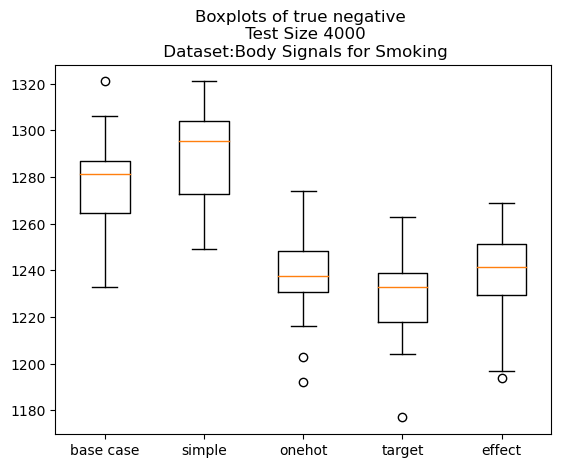

In [50]:
plot_boxplots_confusion(confusion_matrix, '00', which_dataset)

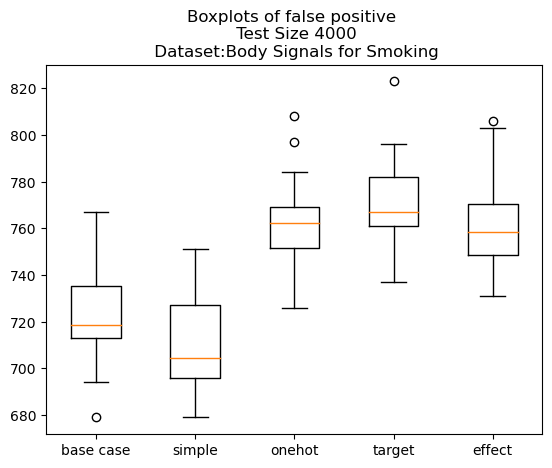

In [51]:
plot_boxplots_confusion(confusion_matrix, '01', which_dataset)

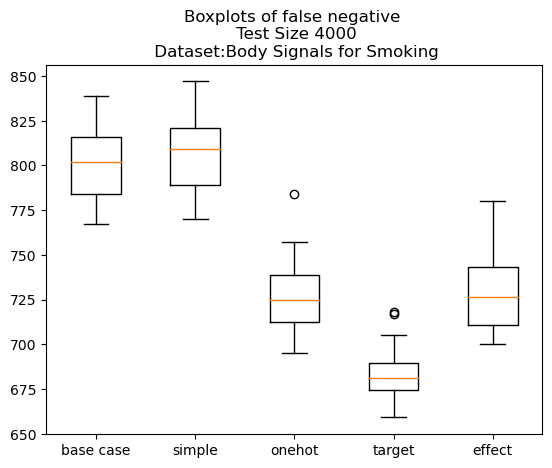

In [52]:
plot_boxplots_confusion(confusion_matrix, '10', which_dataset)

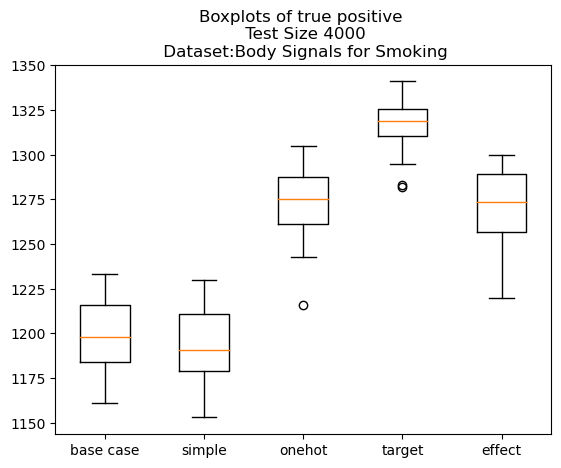

In [53]:
plot_boxplots_confusion(confusion_matrix, '11', which_dataset)

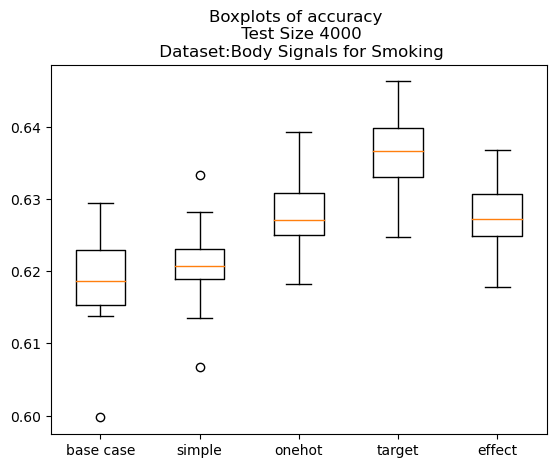

In [54]:
plot_boxplots_confusion(confusion_matrix, 'accuracy', which_dataset)

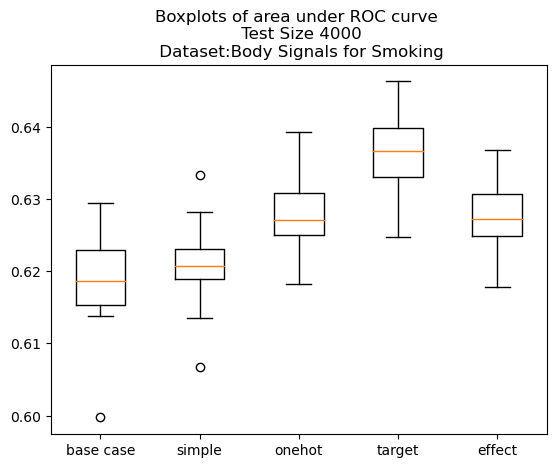

In [55]:
plot_boxplots_confusion(confusion_matrix, 'auc', which_dataset)